In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [69]:
df = pd.DataFrame({
    "Study_Time": [1, 1.5, 1.73, 2, 2.2, 2.6, 3.1, 3.6, 4, 4.5, 5, 5.71, 6, 6.3],
    "Marks": [50, 54, 56, 60, 59, 63, 69, 66, 72, 79, 81, 85, 92, 95]
})

In [70]:
df

,Study_Time,Marks
0,1.00,50
1,1.50,54
2,1.73,56
3,2.00,60
4,2.20,59
5,2.60,63
6,3.10,69
7,3.60,66
8,4.00,72
9,4.50,79


In [71]:
x = df[["Study_Time"]]
y = df[["Marks"]]

In [72]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [74]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(x_test)
y_pred

array([[ 0.59335164],
       [ 1.31075829],
       [-1.48179154]])

In [76]:
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_pred_actual

array([[78.27926511],
       [88.20315514],
       [49.57379808]])

In [77]:
x_train_actual = scaler_x.inverse_transform(x_train)
x_test_actual = scaler_x.inverse_transform(x_test)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual = scaler_y.inverse_transform(y_test)

In [78]:
x_range_scaled = np.linspace(x_scaled.min(), x_scaled.max(), 100).reshape(-1, 1)
y_line_scaled = model.predict(x_range_scaled)
x_range_actual = scaler_x.inverse_transform(x_range_scaled)
y_line_actual = scaler_y.inverse_transform(y_line_scaled)

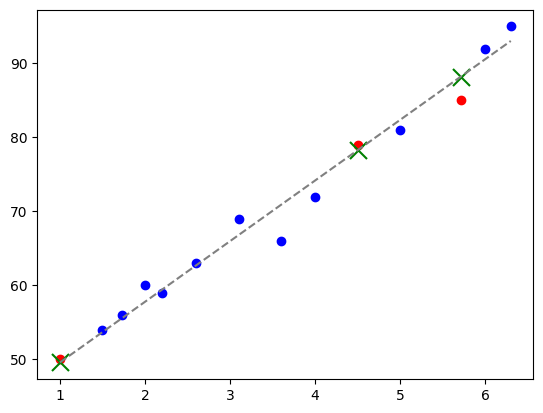

In [81]:
plt.scatter(x_train_actual, y_train_actual, c="b")
plt.scatter(x_test_actual, y_test_actual, c="r")
plt.plot(x_range_actual, y_line_actual, c="gray", linestyle="--")
plt.scatter(x_test_actual, y_pred_actual, marker="x", c="g", s=150)

In [82]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]

In [83]:
print(f'Regression Equation: Marks = {slope} * Study_Time + {intercept}')

Regression Equation: Marks = 1.011816437892959 * Study_Time + 0.01061755802640113
